In [73]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import soundfile as sf

In [74]:
#plt.style.use('ggplot')
plt.style.use('default')

In [75]:
# Specify the path to the .ogg file
file_path = "minha_voz.ogg"
save_path = "images/"

# Read the .ogg file
my_voice_data, my_voice_sample_rate = sf.read(file_path)

# Print the audio data and sample rate
print("Audio Data:", my_voice_data)
print("Sample Rate:", my_voice_sample_rate)

Audio Data: [-3.05175781e-05 -3.05175781e-05 -3.05175781e-05 ... -1.28173828e-03
 -1.19018555e-03 -1.19018555e-03]
Sample Rate: 16000


In [76]:
Audio(data=my_voice_data, rate=my_voice_sample_rate)

In [77]:
N = len(my_voice_data) # Number of samples
fs = my_voice_sample_rate # Sampling frequency
audio_duration = N / fs # Duration in seconds of the audio

time = np.linspace(0, audio_duration, N) # time vector

In [78]:
print('N=',N)
print('audio_duration=',audio_duration,'s')

N= 41245
audio_duration= 2.5778125 s


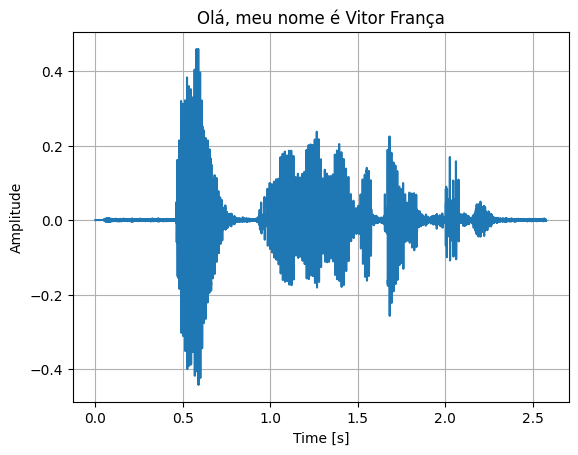

In [79]:
plt.plot(time, my_voice_data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.title('Olá, meu nome é Vitor França')
plt.savefig(save_path+'my_voice_data.png')

The Audio of my voice is a not periodic signal and so it has finite energy.

In [80]:
myvoice_energy = np.sum(my_voice_data**2)
print("Energy of my voice:", myvoice_energy, 'J')

Energy of my voice: 111.67812212649733 J


The frequency spectrum of my voice

In [81]:
spectrum_my_voice_data = np.fft.fft(my_voice_data)

# since it's a real signal, we only need half of the spectrum
spectrum_my_voice_data = spectrum_my_voice_data[:len(spectrum_my_voice_data)//2]

# we want to plot only the absolute value of the spectrum
abs_spectrum_my_voice_data = np.abs(spectrum_my_voice_data)

abs_spectrum_my_voice_data = 2*abs_spectrum_my_voice_data / N

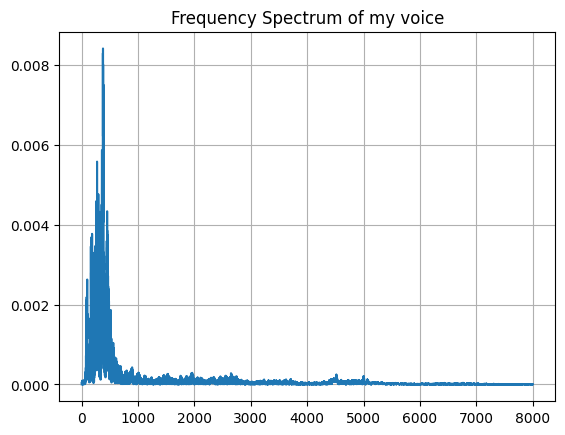

In [82]:
# Frequencies vector
frequencies = np.linspace(0, fs/2, N//2)

plt.title('Frequency Spectrum of my voice')
plt.plot(frequencies, abs_spectrum_my_voice_data)
plt.grid(True)
plt.savefig(save_path+'my_voice_spectrum.png')

My voice it's compose by more than one frequency. It means that found only one frequency can be not so representative about my signal. However, we can found the frequencies bandwidth that contains a specifc amout of my signal energy. 

In [83]:
# Calculate the power spectrum
power_spectrum = np.abs(spectrum_my_voice_data)**2

# Ordering the frequencies and the power_spectrum by decreasing power
sorted_indices = np.argsort(power_spectrum)[::-1]
sorted_power_spectrum = power_spectrum[sorted_indices]
sorted_frequencies = frequencies[sorted_indices]

# total energy in the signal
total_energy = np.sum(sorted_power_spectrum)

# Determining the threshold
threshold = 0.99
energy_threshold =  threshold * total_energy

# Obtaining the indice of the frequencies that contain the threshold percent of the energy
cumulative_energy = np.cumsum(sorted_power_spectrum)
indices_threshold_percent = np.where(cumulative_energy <= energy_threshold)[0]

# Obter as frequências que contêm 90% da energia total
frequencies_90_percent = sorted_frequencies[indices_threshold_percent]

# Mostrar os resultados
print(f"Frequency bandwidth that contains {threshold*100}% of the energy: {frequencies_90_percent[0]:.2f} - {frequencies_90_percent[-1]:.2f} Hz")


Frequency bandwidth that contains 99.0% of the energy: 376.70 - 595.12 Hz


### Questão 2

Goal: Using the Fourier Transform discover what's the musical note of each file.

#### Wave_4 Problem

In [84]:
#I have some problem with audio 4
# Specify the path to the .ogg file
file_path = "./Notas Musicais/audio_4.wav"

# Read the .ogg file
audio_data, audio_sample_rate = sf.read(file_path)

# Print the audio sample rate
print("Sample Rate:", audio_sample_rate)
print("Shape:", audio_data.shape)

Sample Rate: 44100
Shape: (22071, 2)


In [85]:
#Trying to see how to fix it based in other audios
# Specify the path to the .ogg file
file_path = "./Notas Musicais/audio_1.wav"

# Read the .ogg file
audio_data, audio_sample_rate = sf.read(file_path)

# Print the audio sample rate
print("Sample Rate:", audio_sample_rate)
print("Shape:", audio_data.shape)

Sample Rate: 44100
Shape: (160200,)


In [86]:
#The problem is problably the number of channels
file_path = "./Notas Musicais/audio_4.wav"
# Read the .ogg file
audio_data, audio_sample_rate = sf.read(file_path)

audio_data = audio_data.flatten() 
#audio_data = audio_data[:,0] # I will use only one channel
Audio(data=audio_data, rate=audio_sample_rate)

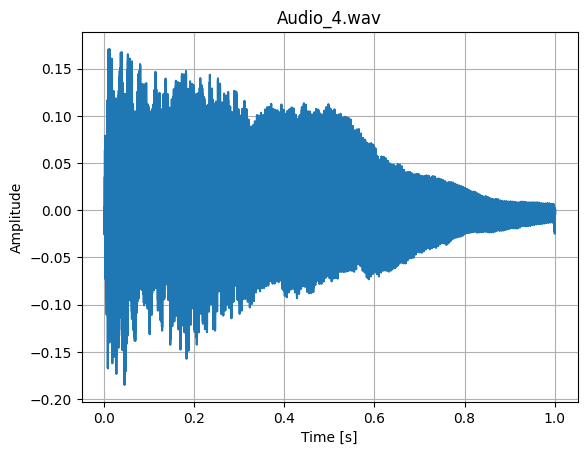

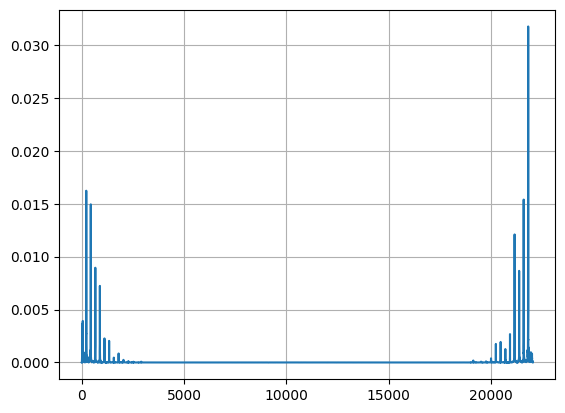

In [87]:
N = len(audio_data) # Number of samples
fs = audio_sample_rate # Sampling frequency
audio_duration = N / fs # Duration in seconds of the audio

time = np.linspace(0, audio_duration, N) # time vector

plt.plot(time, audio_data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.title('Audio_4.wav')
plt.show()


spectrum_audio = np.fft.fft(audio_data)
# we only need half of the spectrum
spectrum_audio = spectrum_audio[:N//2]
# we want to plot only the absolute value of the spectrum
abs_spectrum_audio_data = np.abs(spectrum_audio)
# to better understand the spectrum, we will normalize it
abs_spectrum_audio_data = 2*abs_spectrum_audio_data / N
# Frequencies vector
frequencies = np.linspace(0, fs/2, N//2)
plt.plot(frequencies, abs_spectrum_audio_data)
plt.grid(True)
plt.savefig(save_path+'audio_4_spectrum_flatten.png')

It appears two signals in my FFT, since I know that the notes frequencies are low, I'm expecting only the left part of my plot. 

In [88]:
#The problem is problably the number of channels
file_path = "./Notas Musicais/audio_4.wav"
# Read the .ogg file
audio_data, audio_sample_rate = sf.read(file_path)

audio_data = audio_data[:,0] # I will use only one channel
Audio(data=audio_data, rate=audio_sample_rate)

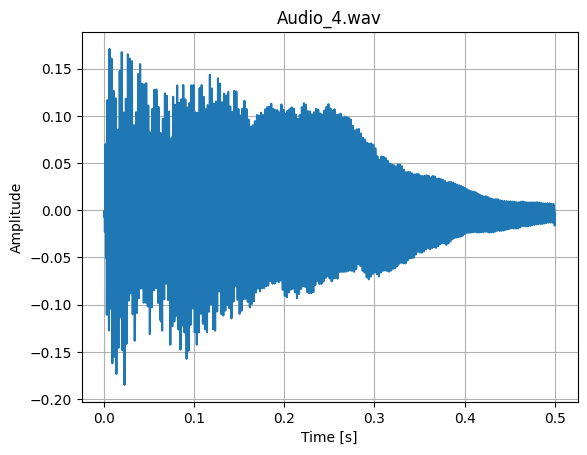

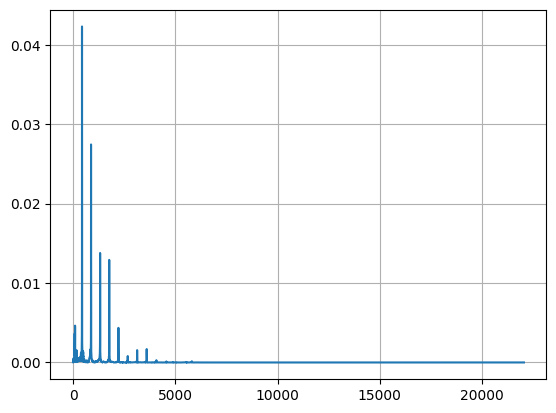

In [89]:
N = len(audio_data) # Number of samples
fs = audio_sample_rate # Sampling frequency
audio_duration = N / fs # Duration in seconds of the audio

time = np.linspace(0, audio_duration, N) # time vector

plt.plot(time, audio_data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)

plt.title('Audio_4.wav')
plt.show()


spectrum_audio = np.fft.fft(audio_data)
# we only need half of the spectrum
spectrum_audio = spectrum_audio[:N//2]
# we want to plot only the absolute value of the spectrum
abs_spectrum_audio_data = np.abs(spectrum_audio)
# to better understand the spectrum, we will normalize it
abs_spectrum_audio_data = 2*abs_spectrum_audio_data / N
# Frequencies vector
frequencies = np.linspace(0, fs/2, N//2)
plt.plot(frequencies, abs_spectrum_audio_data)
plt.grid(True)
plt.savefig(save_path+'audio_4_spectrum_one_channel.png')

It appears to be the correct signal since the frequency spectrum is near to what I was expecting...

Ok, now, we can do the plot for all audio files

File: audio_1.wav; frequency:329.2400654190439Hz; Sample Rate:44100 samples/s
File: audio_2.wav; frequency:294.18886198547216Hz; Sample Rate:44100 samples/s
File: audio_3.wav; frequency:391.9333234112219Hz; Sample Rate:44100 samples/s
File: audio_4.wav; frequency:439.64110929853183Hz; Sample Rate:44100 samples/s
File: audio_5.wav; frequency:349.33271855021707Hz; Sample Rate:44100 samples/s
File: audio_6.wav; frequency:261.3213102686787Hz; Sample Rate:44100 samples/s
File: audio_7.wav; frequency:492.57555847568995Hz; Sample Rate:44100 samples/s


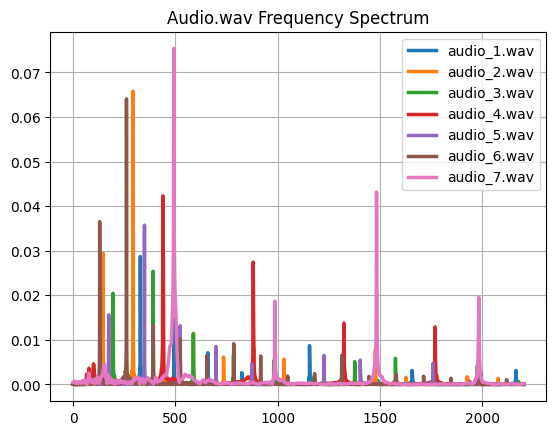

In [90]:
#fig, ax = plt.subplots(3, 3, figsize=(5,25))

for i in range(1, 8):
    # Specify the path to the .ogg file
    file_path = f"./Notas Musicais/audio_{i}.wav"

    # Read the .ogg file
    audio_data, fs = sf.read(file_path)

    # treat the case where the audio has more than one channel (audio_4.wav)
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:,0]

    N = len(audio_data) # Number of samples
    audio_duration = N / fs # Duration in seconds of the audio

    time = np.linspace(0, audio_duration, N) # time vector

    spectrum_audio = np.fft.fft(audio_data)
    # we only need half of the spectrum
    spectrum_audio = spectrum_audio[:N//2]
    
    # we want to plot only the absolute value of the spectrum
    abs_spectrum_audio_data = np.abs(spectrum_audio)
    
    # to better understand the spectrum, we will normalize it
    abs_spectrum_audio_data = 2*abs_spectrum_audio_data / N

    # Frequencies vector
    frequencies = np.linspace(0, fs/2, N//2)

    N_plot = int(0.1*len(frequencies))

    #plot_line_style = ['-', '--']*4
    plt.title('Audio.wav Frequency Spectrum')
    plt.plot(frequencies[0:N_plot], abs_spectrum_audio_data[0:N_plot], label=f"audio_{i}.wav", linewidth=2.5)
    plt.legend()
    plt.grid(True)

    # Print the audio sample rate,
    print(f"File: audio_{i}.wav; frequency:{frequencies[np.argmax(abs_spectrum_audio_data)]}Hz; Sample Rate:{audio_sample_rate} samples/s")

plt.savefig(save_path+'audio_spectrum.png')